In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import shelve
import os
import plot_utilities
%matplotlib inline

In [2]:
dataFolder = "Data"
datasetFolder = "JOAPP"
filename = "JOAPP_data_gc"
fullFilePath = os.path.join(dataFolder, datasetFolder, filename)

network1Key = "foursquare-network"
network2Key = "twitter-network"
combinedNetworkKey = "combined-network"

with shelve.open(fullFilePath) as data:
    network1 = data[network1Key]
    network2 = data[network2Key]
    combined_network = data[combinedNetworkKey]
networks = [network1, network2]

try:
    with shelve.open("pos") as data:
        pos = data["JOAPP"]
except:
    np.random.seed(1)
    pos = nx.spring_layout(combined_network)
    with shelve.open("pos") as data:
        data["JOAPP"] = pos

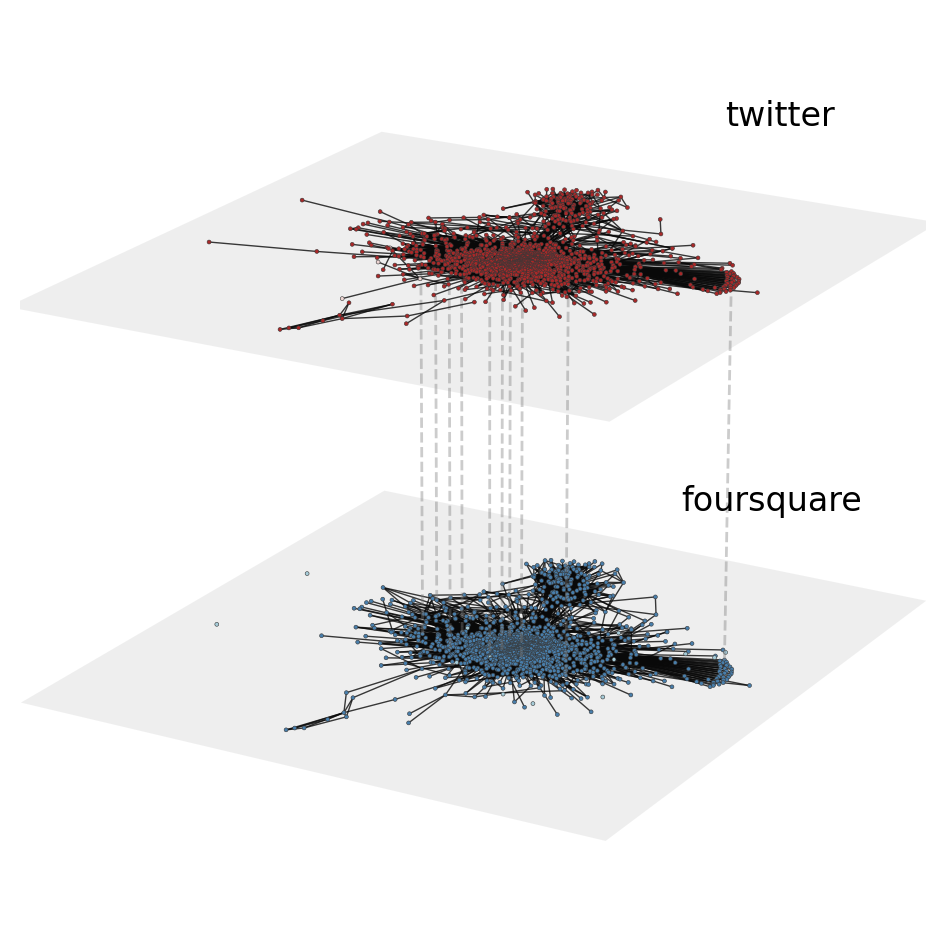

In [7]:
gc_colors = ['steelblue', 'firebrick']
iso_colors = ['lightblue', 'mistyrose']
edge_colors = ['steelblue', 'firebrick']
edge_colors = ['black', 'black']
plane_colors = ['grey', 'grey']
labels = ["foursquare", "twitter"]

fig = plt.figure(figsize=(8, 6), dpi=200)
ax = fig.add_subplot(1, 1, 1, projection='3d')
plot_utilities.plot_multiplex_network(ax, networks, pos, gc_colors, iso_colors, edge_colors, plane_colors, labels, node_size=2, edge_width=0.5, width=8, height=6, label_pos=0.9)
plt.savefig('Figures/multilayer_network_JOAPP.pdf',dpi=600,bbox_inches='tight')
plt.savefig('Figures/multilayer_network_JOAPP.png',dpi=600,bbox_inches='tight')
plt.show()